In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def custo (teta,X,y):
    m=len(y)
    yhat=X.dot(teta)
    c = np.sum(np.square(yhat-y))/m
    return c

In [4]:
def grad(teta,X,y):
    m=len(y)
    yhat=X.dot(teta)
    gr=2*np.sum(X.T.dot(yhat-y),axis=1)/m
    return gr

In [5]:
def gradd(teta,X,y,niter=100,epsilon=0.01):
    tt=np.zeros((teta.shape[0],niter))
    erro = np.zeros(niter)
    for i in range(niter):
        tt[:,i]=teta
        teta=teta-epsilon*grad(teta,X,y)
        erro[i]=custo(teta,X,y)
    return teta,tt,erro
        

In [6]:
def plotcusto(zz,lr=None):
    fig,ax = plt.subplots(figsize=(12,8))

    ax.set_ylabel('Custo')
    ax.set_xlabel('passo')
    if lr is not None:  
        ax.set_title("learning rate:{}".format(lr))
    _=ax.plot(range(len(zz[2])),zz[2],'b.')

In [7]:
def plotpontos(zz,n=0,lr=None):
    dat=zz[1][n,:]
    fig,ax = plt.subplots(figsize=(12,8))
    ax.set_ylabel('teta {}'.format(n))
    ax.set_xlabel('passo')
    if lr is not None:  
        ax.set_title("learning rate:{}".format(lr))
    ax.plot(range(len(dat)),dat,'b.')

In [8]:
def mkpontos():
    x1 = np.random.rand(100,1)
    x2 = np.random.rand(100,1)
    y=40+8*x1-5*x2+3*np.random.rand(100,1)
    X = np.hstack((x1,x2))
    return X,y

# Le os dados

In [9]:

Xz = np.load("Ex3X.npy")
y=np.load("Ex3y.npy")

In [10]:
def mknewX(X):
    n=X.shape[0]
    return np.hstack((np.ones(n).reshape((n,1)),X))

In [11]:
X=mknewX(Xz)

In [12]:
def exper(lr=0.001):
    zz=gradd(np.array([0,0,0]),X,y,niter=100,epsilon=lr)
    plotcusto(zz,lr)
    plotpontos(zz,1,lr)
    plotpontos(zz,2,lr)

# Experimentos em batchGD

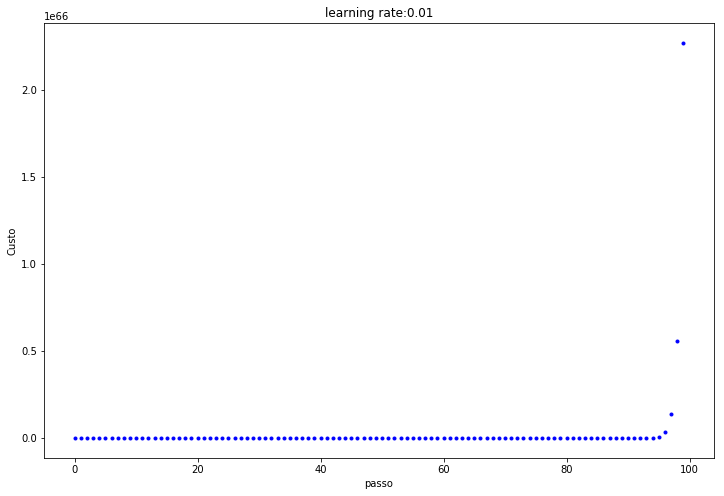

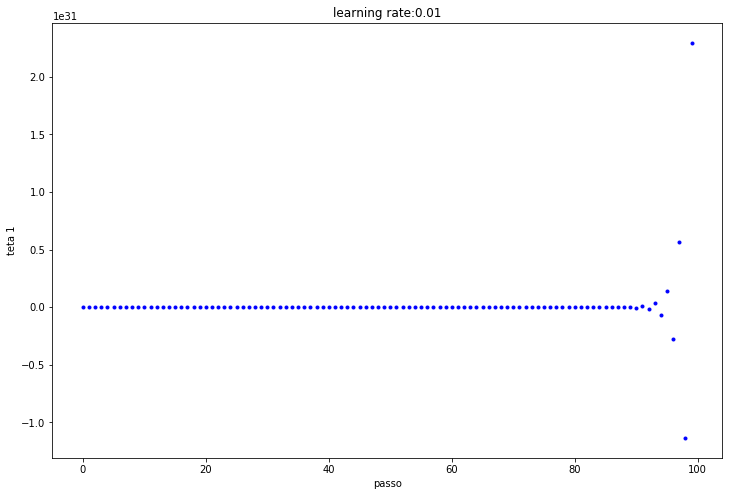

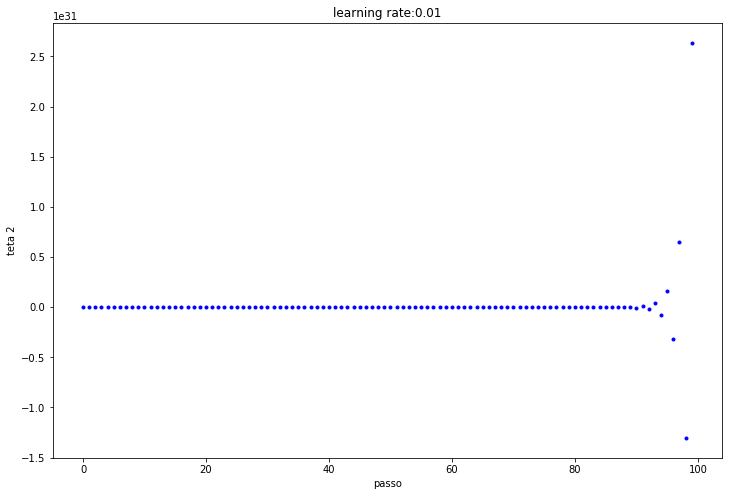

In [13]:
exper(0.01)

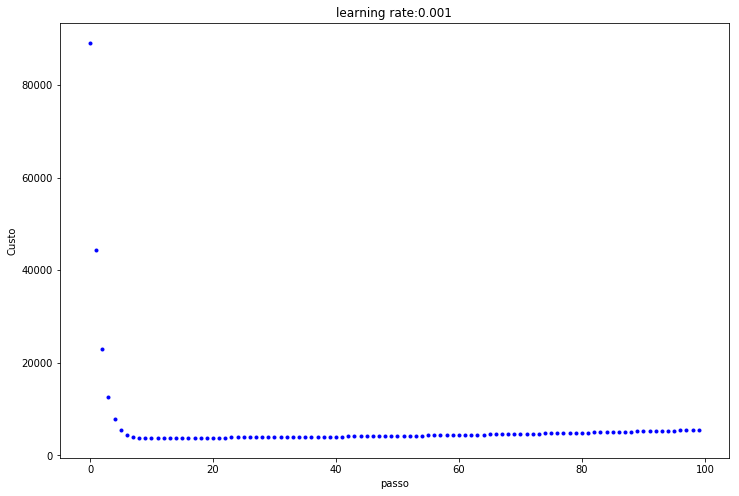

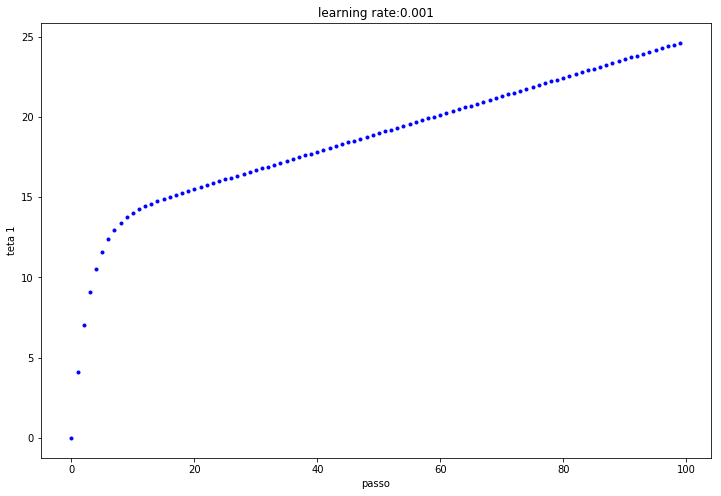

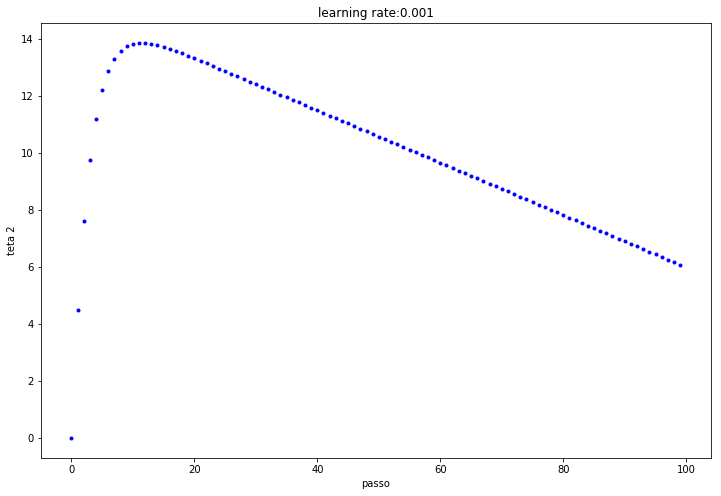

In [14]:
exper(0.001)

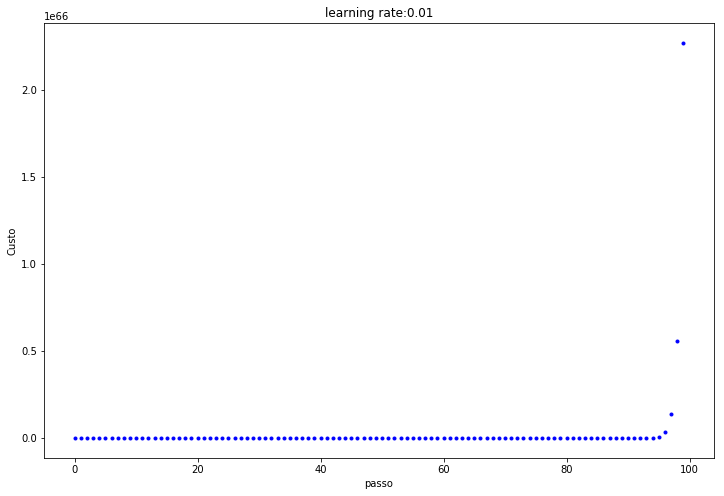

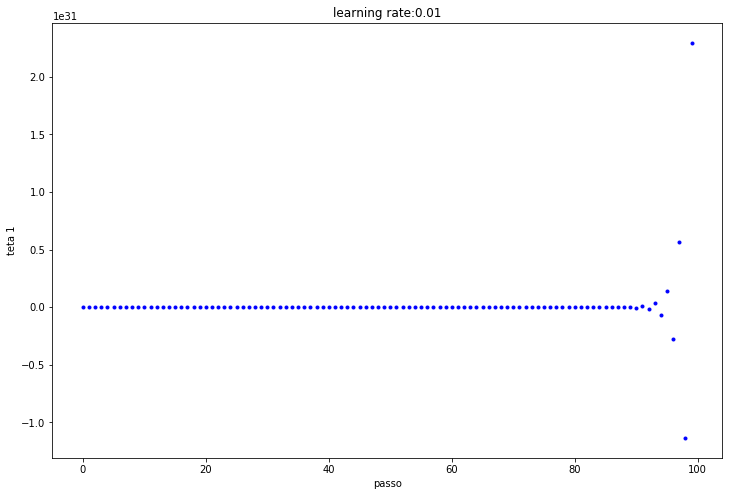

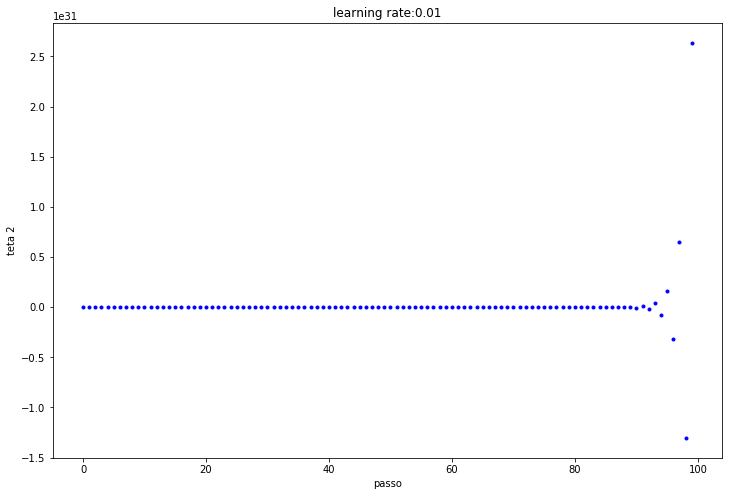

In [15]:
exper(0.01)

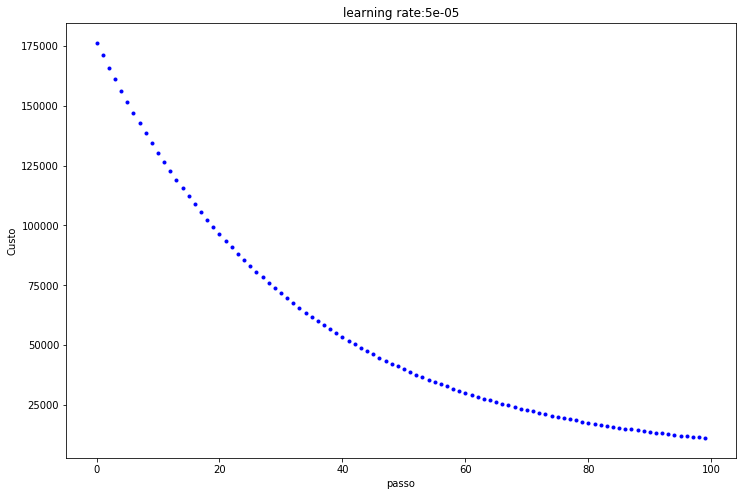

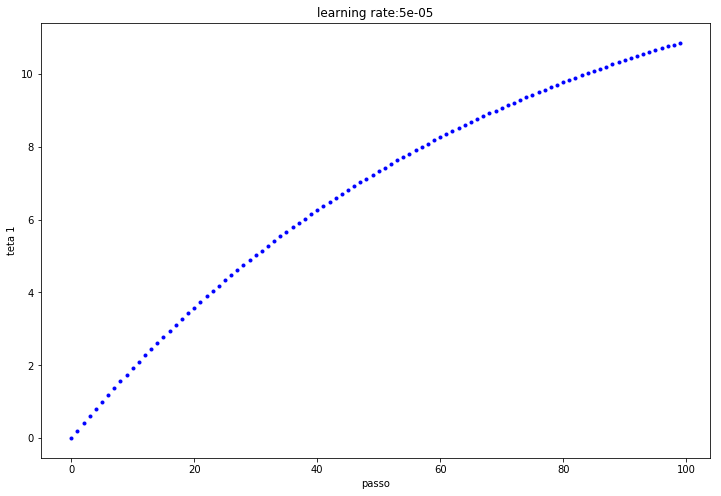

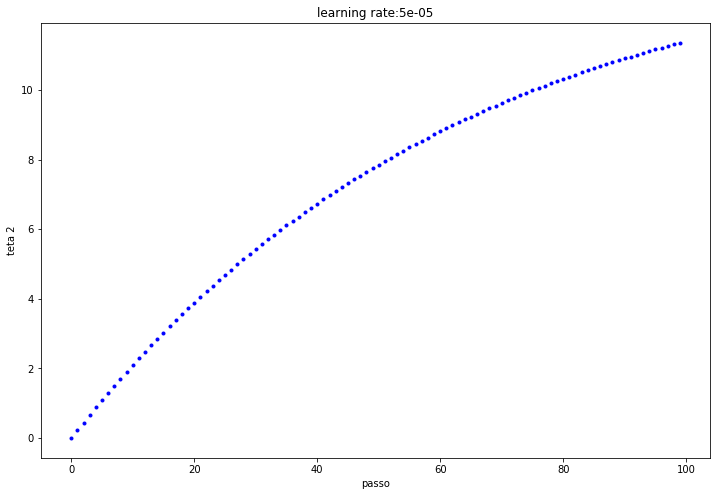

In [16]:
exper(0.00005)

# SGD

In [17]:
import random
def sgd(teta,X,y,niter=100,epsilon=0.01):
    m=len(y)
    tt=np.zeros((teta.shape[0],niter))
    erro = np.zeros(niter)
    for i in range(niter):
        j = random.randrange(m)
        tt[:,i]=teta
        
        gr=2*X[j,:]*(X[j,:].dot(teta)-y[j])/m
        teta=teta-epsilon*gr
        erro[i]=custo(teta,X,y)
    return teta,tt,erro
        

In [18]:
zz=sgd(np.array([0,0,0]),X,y,niter=2000,epsilon=0.05)

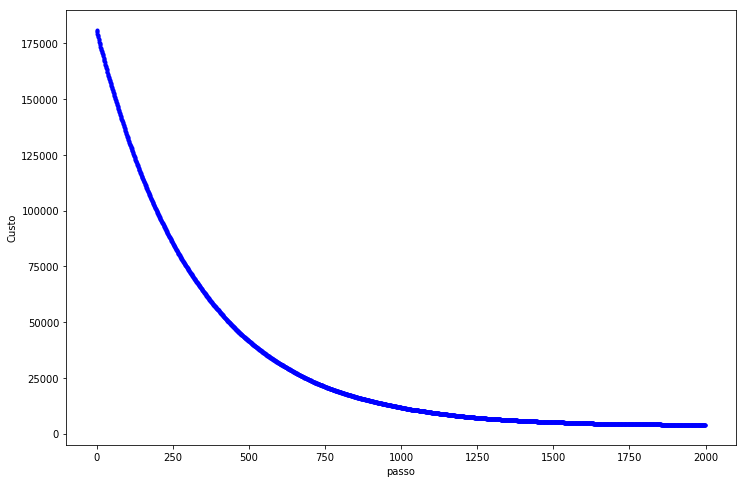

In [19]:
plotcusto(zz)

# Mini Batch GD

In [20]:
def mbgd(teta,X,y,k=10,niter=2000,epsilon=0.05):
    m=len(y)
    tt=np.zeros((teta.shape[0],niter))
    erro = np.zeros(niter)
    for i in range(niter):
        j = np.random.randint(0,m,k)
        tt[:,i]=teta
        gr=2*np.sum(X[j].T.dot(X[j].dot(teta)-y[j]),axis=1)/m
        teta=teta-epsilon*gr
        erro[i]=custo(teta,X,y)
    return teta,tt,erro
        

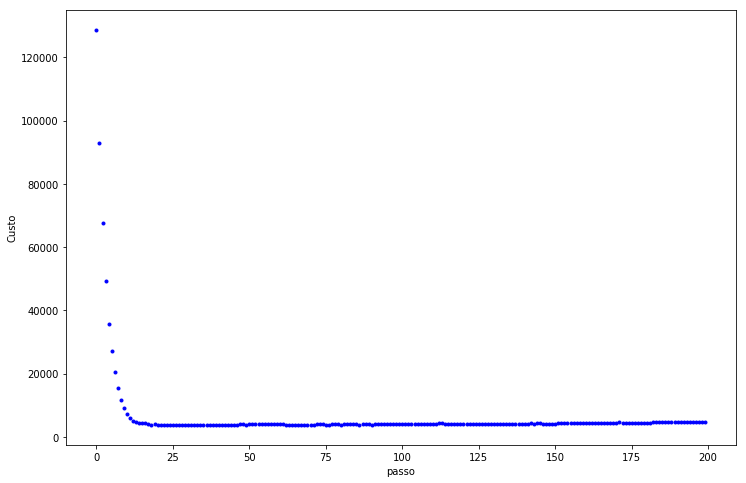

In [21]:
zz=mbgd(np.array([0,0,0]),X,y,10,niter=200,epsilon=0.05)
plotcusto(zz)